In [2]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time,os

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://www.primelocation.com/to-rent/property/london/?page_size=50"]
for page in range(2,201):
    pages.append("https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=" +str (page))
    
pages

['https://www.primelocation.com/to-rent/property/london/?page_size=50',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=2',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=3',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=4',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=5',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=6',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&page_size=50&q=London&results_sort=newest_listings&radius=0&pn=7',
 'https://www.primelocation.com/to-rent/property/london/?identifier=london&p

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"listing-results-price text-price"}):
        links.append("https://www.primelocation.com" + resulthf.get("href"))

links

['https://www.primelocation.com/to-rent/details/64124346/?weekly_featured=1&utm_content=featured_listing',
 'https://www.primelocation.com/to-rent/details/64040613/?featured=1&utm_content=featured_listing',
 'https://www.primelocation.com/to-rent/details/53306241/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/62256355/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/61996080/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/61263625/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/49033899/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/62779966/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.primelocation.com/to-rent/details/63474062/?search_identifier=28369722e4b1c3dd0a55e01393574e31',
 'https://www.pr

In [5]:
len(links)

8688

In [31]:
ex=getAndParseURL("https://www.primelocation.com/to-rent/details/57253657/?search_identifier=28369722e4b1c3dd0a55e01393574e31")

In [33]:
### for location info ###
ex.find("h1",{"class":"listing-details-h1"}).text[15:].strip()

'to rent in Cornwall Terrace, London NW1'

In [32]:
### For Rent Price ###
ex.find("span",{"class":"price"}).text.strip()[0:7].replace("£","").replace(",","").strip()

'86667'

In [19]:
### For deposit###
ex.find("div",{"class":"nts_value"}).text.strip().replace("£","").replace(",","")

'2475'

In [25]:
### reception room num ###
ex.find("span",{"class":"num-icon num-reception"}).text.strip()

'1'

In [26]:
### bath num ###
ex.find("span",{"class":"num-icon num-baths"}).text.strip()

'1'

In [27]:
### Bedroom Number ###
ex.find("span",{"class":"num-icon num-beds"}).text.strip()

'2'

In [34]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("h1",{"class":"listing-details-h1"}).text[15:].strip()
    except:
        location = np.nan
    try:
        rent = html.find("span",{"class":"price"}).text.strip()[0:7].replace("£","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.find("div",{"class":"nts_value"}).text.strip().replace("£","").replace(",","")
    except:
        deposit = np.nan
    try:
        bedrooms = html.find("span",{"class":"num-icon num-beds"}).text.strip()
    except:
        bedrooms = np.nan
    try:
        bathroom = html.find("span",{"class":"num-icon num-baths"}).text.strip()
    except:
        bathroom = np.nan
    try:
        reception_room = html.find("span",{"class":"num-icon num-reception"}).text.strip()
    except:
        reception_room = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,bedrooms,bathroom,reception_room])
    
columns=["Location","Rent","Deposit","Rooms","Bathroom","Reception Room"]
df = pd.DataFrame.from_records(result, columns=columns)

In [35]:
df

,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
0,"Farquhar Road, Crystal Palace, London SE19",4000,Not available,2,1,2
1,"to rent in York Terrace West, Regent's Park, L...",217 pc,Not available,NaN,NaN,NaN
2,"Park Lane, Mayfair W1K",POA,Not available,2,2,NaN
3,"to rent in Westminster, London SW1P",26000,Not available,7,5,5
4,"Knightsbridge, London SW1X",21666,Not available,5,5,1
...,...,...,...,...,...,...
8683,"ouse to rent in St. Johns Road, London NW11",4983,Not available,6,3,NaN
8684,"Harrow View, Harrow HA1",1550,1780,2,1,1
8685,"Leinster Gardens, London W2",2752,Not available,2,1,1
8686,"Lakeside Drive, Park Royal, London NW10",2999,Not available,2,2,1


In [36]:
df.to_csv("londonn_rental.csv")

In [39]:
df["Rent"].unique()

array(['4000', '217 pc', 'POA', '26000', '21666', '15000', '13000',
       '12558', '12118', '12090', '10833', '10400', '97500', '95333',
       '88833', '86667', '83720', '80167', '80000', '80002', '78000',
       '75833', '4500', '3684', '1517', '2600', '1550', '1751', '2200',
       '3500', '4300', '1864', '2500', '2709', '2167', '45000', '1400',
       '9500', '1700', '3175', '1300', '1500', '1750', '950 pc', '1600',
       '750 pc', '2000', '3100', '1232', '2599', '1245', '1295', '2145',
       '1387', '3000', '1021', '1083', '3800', '1650', '1845', '7583',
       '2700', '2400', '2250', '1105', '1217', '3683', '1412', '700 pc',
       '3012', '7280', '3600', '2450', '1875', '1900', '6500', '3120',
       '3350', '16033', '5200', '1950', '7000', '2650', '4550', '2150',
       '1150', '1560', '9373', '1850', '55000', '2750', '1916', '2300',
       '900 pc', '4004', '2061', '4008', '5980', '1350', '1395', '1450',
       '1800', '8667', '1200', '1775', '3878', '1250', '2383', '3165',

In [40]:
df.head()

,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
0,"Farquhar Road, Crystal Palace, London SE19",4000,Not available,2,1,2
1,"to rent in York Terrace West, Regent's Park, L...",217 pc,Not available,NaN,NaN,NaN
2,"Park Lane, Mayfair W1K",POA,Not available,2,2,NaN
3,"to rent in Westminster, London SW1P",26000,Not available,7,5,5
4,"Knightsbridge, London SW1X",21666,Not available,5,5,1


In [41]:
df.tail()

,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
8683,"ouse to rent in St. Johns Road, London NW11",4983,Not available,6,3,NaN
8684,"Harrow View, Harrow HA1",1550,1780,2,1,1
8685,"Leinster Gardens, London W2",2752,Not available,2,1,1
8686,"Lakeside Drive, Park Royal, London NW10",2999,Not available,2,2,1
8687,"Avondale Road, South Croydon CR2",1755,Not available,2,1,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location        8637 non-null   object
 1   Rent            8688 non-null   object
 2   Deposit         8637 non-null   object
 3   Rooms           7806 non-null   object
 4   Bathroom        8356 non-null   object
 5   Reception Room  6301 non-null   object
dtypes: object(6)
memory usage: 407.4+ KB


In [48]:
df.sample()

,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
2735,"Cliff Villas, London NW1",3445,Not available,2,NaN,NaN


In [5]:
df["Deposit"].unique()

array(['Not available', '180000', '150000', '125000', '123000', '75000',
       '120000', '111000', '108000', '105000', '1788', '1616', '1962',
       '1500', '1903', '2826', '1315', '22200', '7200', '12978', '1',
       '2134', '1904', '2653', '2250', '3115', '4620', '1615', '1961.54',
       '3000', '2596', '4475', '3475', '1442', '2307', '4625', '2019.23',
       '4450', '2278', '7500', '7890', '3950', '2019', '2475', '2423',
       '1625', '1624', '3865', '4788', '1384', '2539', '3173', '1375',
       '1955', '2077', '4750', '1153', '1800', '2500', '4153', '2884',
       '3550', '3230', '3500', '1847', '4038', '3288', '3250', '2192',
       '1961', '5500', '2975', '2020', '2596.15', '1615.38', '2875',
       '3576', '2310', '1557.69', '12600', '3400', '2050', '7330', '2595',
       '2625', '2375', '2885', '1494.23', '1730', '1673', '1476.92',
       '800', '1442.3', '2700', '2653.84', '1000', '2307.69', '1584',
       '1984', '2942', '10250', '2365', '1895', '4125', '1211', '5000',

In [3]:
df=pd.read_csv("londonn_rental.csv")

In [4]:
df

,Unnamed: 0,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
0,0,"Farquhar Road, Crystal Palace, London SE19",4000,Not available,2.0,1.0,2.0
1,1,"to rent in York Terrace West, Regent's Park, L...",217 pc,Not available,NaN,NaN,NaN
2,2,"Park Lane, Mayfair W1K",POA,Not available,2.0,2.0,NaN
3,3,"to rent in Westminster, London SW1P",26000,Not available,7.0,5.0,5.0
4,4,"Knightsbridge, London SW1X",21666,Not available,5.0,5.0,1.0
...,...,...,...,...,...,...,...
8683,8683,"ouse to rent in St. Johns Road, London NW11",4983,Not available,6.0,3.0,NaN
8684,8684,"Harrow View, Harrow HA1",1550,1780,2.0,1.0,1.0
8685,8685,"Leinster Gardens, London W2",2752,Not available,2.0,1.0,1.0
8686,8686,"Lakeside Drive, Park Royal, London NW10",2999,Not available,2.0,2.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688 entries, 0 to 8687
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8688 non-null   int64  
 1   Location        8637 non-null   object 
 2   Rent            8688 non-null   object 
 3   Deposit         8637 non-null   object 
 4   Rooms           7806 non-null   float64
 5   Bathroom        8356 non-null   float64
 6   Reception Room  6301 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 475.2+ KB


In [8]:
df["Rent"].unique()

array(['4000', '217 ', '', '26000', '21666', '15000', '13000', '12558',
       '12118', '12090', '10833', '10400', '97500', '95333', '88833',
       '86667', '83720', '80167', '80000', '80002', '78000', '75833',
       '4500', '3684', '1517', '2600', '1550', '1751', '2200', '3500',
       '4300', '1864', '2500', '2709', '2167', '45000', '1400', '9500',
       '1700', '3175', '1300', '1500', '1750', '950 ', '1600', '750 ',
       '2000', '3100', '1232', '2599', '1245', '1295', '2145', '1387',
       '3000', '1021', '1083', '3800', '1650', '1845', '7583', '2700',
       '2400', '2250', '1105', '1217', '3683', '1412', '700 ', '3012',
       '7280', '3600', '2450', '1875', '1900', '6500', '3120', '3350',
       '16033', '5200', '1950', '7000', '2650', '4550', '2150', '1150',
       '1560', '9373', '1850', '55000', '2750', '1916', '2300', '900 ',
       '4004', '2061', '4008', '5980', '1350', '1395', '1450', '1800',
       '8667', '1200', '1775', '3878', '1250', '2383', '3165', '4450',
    

In [4]:
df['Rent'] = df['Rent'].apply(lambda x: x.replace("pc", ""))
df['Rent'] = df['Rent'].apply(lambda x: x.replace("POA", "2500"))

In [5]:
df["Rent"]=df["Rent"].astype(float)

In [6]:
df= df.loc[(df["Rent"] >= 800) & (df["Rent"] <= 12000),:]

In [7]:
### Average Rental Price for flat (Pound) ###
df["Rent"].mean()

2890.791696492484

In [8]:
### 1 Pound equal 1.14 Euro###
df["Rent"]=df["Rent"].apply(lambda x :float(x)*1.14)

In [9]:
### Average Rental Price for flat (EURO) ###
df["Rent"].mean()

3295.5025340014313

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8382 entries, 0 to 8687
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8382 non-null   int64  
 1   Location        8333 non-null   object 
 2   Rent            8382 non-null   float64
 3   Deposit         8333 non-null   object 
 4   Rooms           7547 non-null   float64
 5   Bathroom        8075 non-null   float64
 6   Reception Room  6113 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 523.9+ KB


In [13]:
type(df["Deposit"])

pandas.core.series.Series

In [10]:
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("nan", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("992 years", "6590"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("0.14", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("169 years", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("982 years", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("982 years", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("176 years", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("985 years", "3295"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("965", "6590"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("989", "6590"))
df['Deposit'] = df['Deposit'].apply(lambda x: str(x).replace("6590 years", "6590"))

In [11]:
df["Deposit"] = df["Deposit"].astype(float)

ValueError: could not convert string to float: 'Not available'

In [28]:
df= df.loc[(df["Deposit"] >= 800) & (df["Rent"] <= 16000),:]

In [29]:
### Average Deposit in Pounds ###
df["Deposit"].mean()

3293.9790596550074

In [30]:
### Average Deposit In Euros ###
3294*1.14

3755.16

In [21]:
df["Deposit"].unique()

array(['3295', '150000', '125000', '1788', '1616', '1962', '1500', '1903',
       '2826', '1315', '7200', '12978', '1', '2134', '1904', '2653',
       '2250', '3115', '4620', '1615', '1961.54', '3000', '2596', '4475',
       '3475', '1442', '2307', '4625', '2019.23', '4450', '2278', '7500',
       '7890', '3950', '2019', '2475', '2423', '1625', '1624', '3865',
       '4788', '1384', '2539', '3173', '1375', '1955', '2077', '4750',
       '1153', '1800', '2500', '4153', '2884', '3550', '3230', '3500',
       '1847', '4038', '3288', '3250', '2192', '1961', '5500', '2975',
       '2020', '2596.15', '1615.38', '2875', '3576', '2310', '1557.69',
       '12600', '3400', '2050', '7330', '2595', '2625', '2375', '2885',
       '1494.23', '1730', '1673', '1476.92', '1442.3', '2700', '2653.84',
       '1000', '2307.69', '1584', '1984', '2942', '10250', '2365', '1895',
       '4125', '1211', '2308', '6600', '2711.53', '3575', '4615', '5625',
       '1150', '2600', '3057', '3900', '6230.76', '1100',

In [33]:
df["Bathroom"].unique()

array(['10', '20', '50', '60', '30', '40', '100', '70', '1', '90'],
      dtype=object)

In [12]:
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace(".", ""))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("nan", "1"))


In [13]:
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("10", "1"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("20", "2"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("50", "5"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("60", "6"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("30", "3"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("40", "4"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("100", "10"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("70", "7"))
df['Bathroom'] = df['Bathroom'].apply(lambda x: str(x).replace("90", "9"))

In [14]:
df["Bathroom"]=df["Bathroom"].astype(int)

In [15]:
df["Bathroom"].mean()

1.4570508231925554

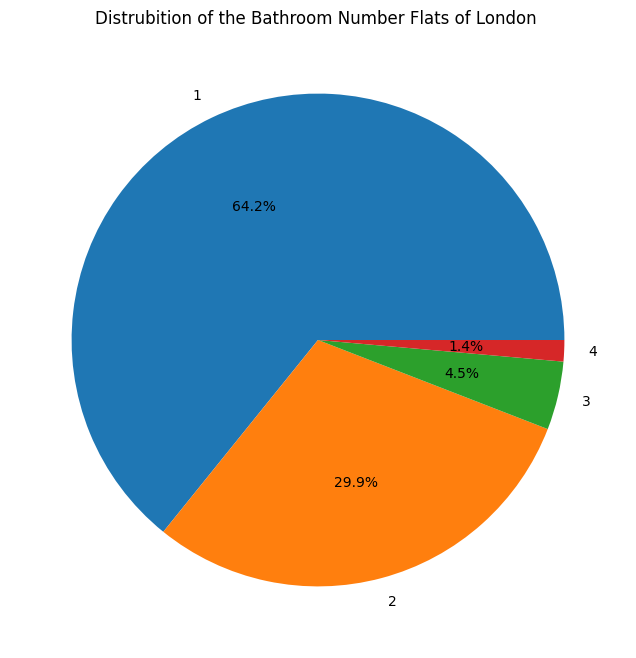

In [39]:
# get the value counts of the 'Bedroom' column
room_counts = df['Bathroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bathroom_counts = room_counts[room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bathroom_counts, labels=filtered_bathroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bathroom Number Flats of London ')

# display the chart
plt.show()


In [16]:
df["Rooms"].unique()

array([ 2.,  7.,  5.,  6., 10.,  4.,  3.,  1., nan,  8.])

In [41]:
df

,Unnamed: 0,Location,Rent,Deposit,Rooms,Bathroom,Reception Room
0,0,"Farquhar Road, Crystal Palace, London SE19",4560.00,3295.0,2.0,1,2.0
2,2,"Park Lane, Mayfair W1K",2850.00,3295.0,2.0,2,NaN
13,13,"to rent in Westminster, London SW1P",12349.62,3295.0,7.0,5,5.0
14,14,"t in Hanover Terrace, London NW1",12349.62,3295.0,5.0,6,5.0
15,15,"to rent in Hanover Terrace, St Johns Wood NW1,",12349.62,3295.0,5.0,3,4.0
...,...,...,...,...,...,...,...
8683,8683,"ouse to rent in St. Johns Road, London NW11",5680.62,3295.0,6.0,3,NaN
8684,8684,"Harrow View, Harrow HA1",1767.00,1780.0,2.0,1,1.0
8685,8685,"Leinster Gardens, London W2",3137.28,3295.0,2.0,1,1.0
8686,8686,"Lakeside Drive, Park Royal, London NW10",3418.86,3295.0,2.0,2,1.0


In [17]:
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace(".", ""))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("nan", "1"))

df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("10", "1"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("20", "2"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("50", "5"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("60", "6"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("30", "3"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("40", "4"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("100", "10"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("70", "7"))
df['Rooms'] = df['Rooms'].apply(lambda x: str(x).replace("80", "9"))


In [18]:
df["Rooms"]=df["Rooms"].astype(int)

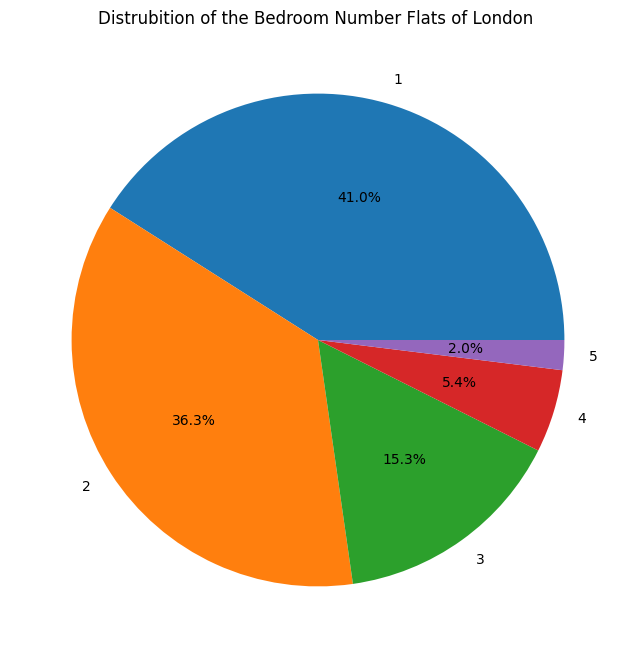

In [20]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of London ')

# display the chart
plt.show();


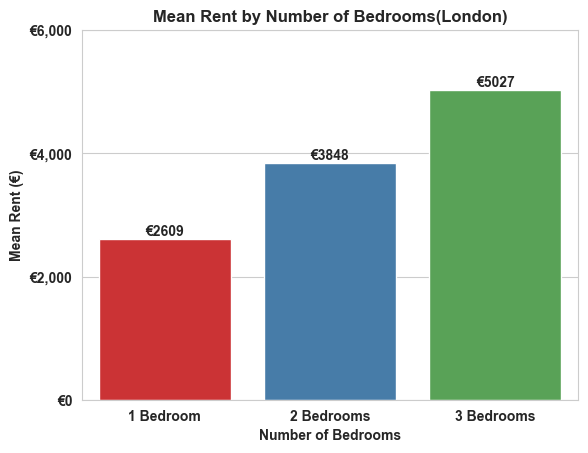

In [22]:
# Calculate mean rent for each group and multiply with 1.14
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean() * 1.14
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean() * 1.14
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean() * 1.14

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 4000, 6000])
ax.set_yticklabels(['€0', '€2,000', '€4,000', '€6,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(London)', weight='bold')

plt.show();